In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 1.perform basic EDA

In [13]:
df = pd.read_csv("C:\\Users\\AMAN MUJEEB\\Downloads\\house_price.csv")


In [17]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [16]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  int64  
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 722.0+ KB
None
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.0

In [20]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [21]:
df.duplicated().sum()

1049

In [23]:
df = df.drop_duplicates()

In [24]:
df.duplicated().sum()

0

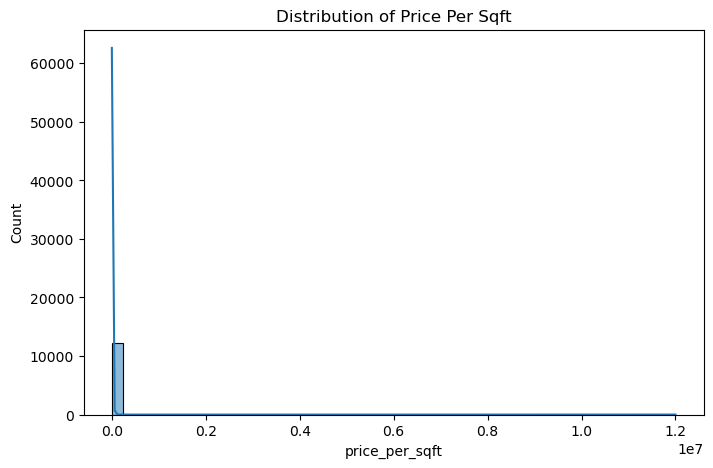

In [26]:
# Price per sqft analysis
plt.figure(figsize=(8, 5))
sns.histplot(df["price_per_sqft"], bins=50, kde=True)
plt.title("Distribution of Price Per Sqft")
plt.show()

# Outlier Removal Methods
# 1. Mean & Standard Deviation

In [48]:
# Calculate mean and standard deviation
mean_value = df["price_per_sqft"].mean()
std_value = df["price_per_sqft"].std()
# Define outlier bounds
lower_bound = mean_value - (3 * std_value)
upper_bound = mean_value + (3 * std_value)
# Remove outliers
df_std_filtered = df[(df["price_per_sqft"] >= lower_bound) & (df["price_per_sqft"] <= upper_bound)]
print("Rows after Mean & Std Dev method:", len(df_std_filtered))

Rows after Mean & Std Dev method: 12146


# 2. percentile method

In [49]:
# Define lower and upper percentile thresholds
lower_percentile = df["price_per_sqft"].quantile(0.05)
upper_percentile = df["price_per_sqft"].quantile(0.95)

# Remove outliers
df_percentile_filtered = df[(df["price_per_sqft"] >= lower_percentile) & 
                            (df["price_per_sqft"] <= upper_percentile)]

print("Rows after Percentile method:", len(df_percentile_filtered))


Rows after Percentile method: 10940


# IQR method

In [50]:
# Calculate IQR
Q1 = df["price_per_sqft"].quantile(0.25)
Q3 = df["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_iqr_bound = Q1 - (1.5 * IQR)
upper_iqr_bound = Q3 + (1.5 * IQR)

# Remove outliers
df_iqr_filtered = df[(df["price_per_sqft"] >= lower_iqr_bound) & 
                     (df["price_per_sqft"] <= upper_iqr_bound)]

print("Rows after IQR method:", len(df_iqr_filtered))


Rows after IQR method: 11009


# 4. zscore method

In [51]:
from scipy.stats import zscore

# Copy dataframe
df_z = df.copy()

# Compute Z-score
df_z["z_score"] = zscore(df_z["price_per_sqft"])

# Impute outliers with median
median_price_per_sqft = df_z["price_per_sqft"].median()
df_z.loc[df_z["z_score"].abs() > 3, "price_per_sqft"] = median_price_per_sqft

# Drop Z-score column after imputation
df_z.drop(columns=["z_score"], inplace=True)

print("Rows after Z-score method (imputation used):", len(df_z))


Rows after Z-score method (imputation used): 12151


# 3.Data for boxplot

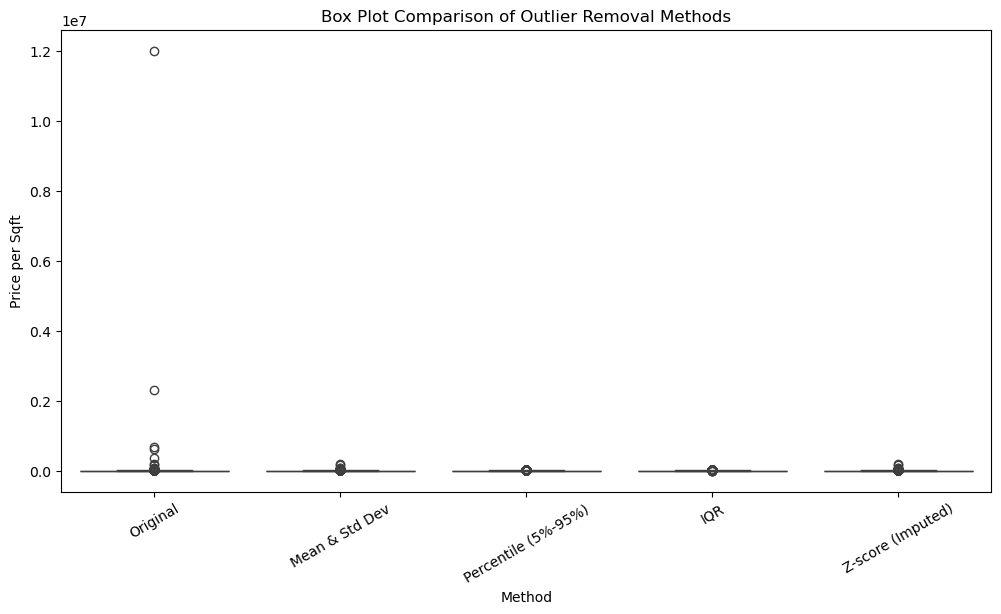

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
df = pd.read_csv("C:\\Users\\AMAN MUJEEB\\Downloads\\house_price.csv")

# Ensure the column exists in the dataset
if "price_per_sqft" not in df.columns:
    raise ValueError("Column 'price_per_sqft' not found in dataset.")

# Extract the price_per_sqft column
original_data = df["price_per_sqft"].copy()

# 1. Mean & Standard Deviation Method (Trimming)
mean_value = original_data.mean()
std_value = original_data.std()
lower_bound = mean_value - (3 * std_value)
upper_bound = mean_value + (3 * std_value)
df_std_filtered = df[(df["price_per_sqft"] >= lower_bound) & (df["price_per_sqft"] <= upper_bound)]

# 2. Percentile Method (5%-95%) (Trimming)
lower_percentile = original_data.quantile(0.05)
upper_percentile = original_data.quantile(0.95)
df_percentile_filtered = df[(df["price_per_sqft"] >= lower_percentile) & (df["price_per_sqft"] <= upper_percentile)]

# 3. IQR Method (Trimming)
Q1 = original_data.quantile(0.25)
Q3 = original_data.quantile(0.75)
IQR = Q3 - Q1
lower_iqr_bound = Q1 - (1.5 * IQR)
upper_iqr_bound = Q3 + (1.5 * IQR)
df_iqr_filtered = df[(df["price_per_sqft"] >= lower_iqr_bound) & (df["price_per_sqft"] <= upper_iqr_bound)]

# 4. Z-score Method (Imputation using Median)
df_z = df.copy()
df_z["z_score"] = zscore(df_z["price_per_sqft"])
median_price_per_sqft = df_z["price_per_sqft"].median()
df_z.loc[df_z["z_score"].abs() > 3, "price_per_sqft"] = median_price_per_sqft
df_z.drop(columns=["z_score"], inplace=True)

# Prepare Data for Box Plot
methods_data = {
    "Original": original_data,
    "Mean & Std Dev": df_std_filtered["price_per_sqft"],
    "Percentile (5%-95%)": df_percentile_filtered["price_per_sqft"],
    "IQR": df_iqr_filtered["price_per_sqft"],
    "Z-score (Imputed)": df_z["price_per_sqft"],
}

# Convert to DataFrame for visualization
df_boxplot = pd.melt(pd.DataFrame(methods_data), var_name="Method", value_name="Price per Sqft")

# Create Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Method", y="Price per Sqft", data=df_boxplot)
plt.xticks(rotation=30)
plt.title("Box Plot Comparison of Outlier Removal Methods")
plt.ylabel("Price per Sqft")
plt.show()


# 4. Analyzing Normality of Price per Sqft: Histogram, Skewness & Transformations

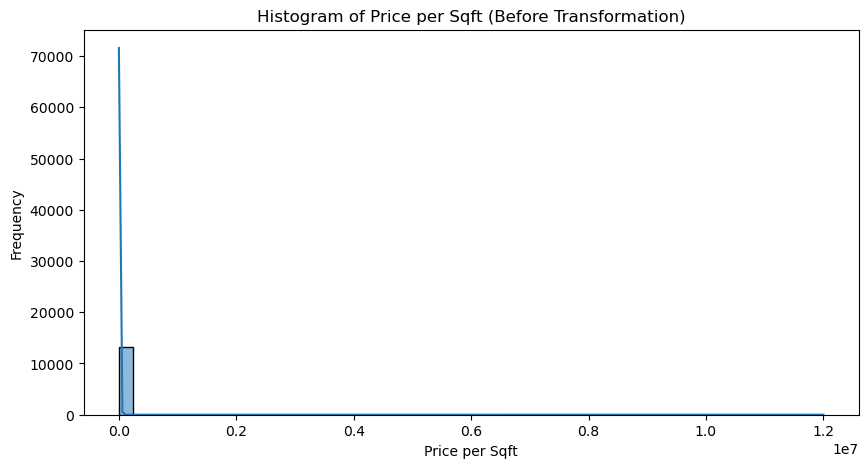

Skewness before transformation: 108.27
Kurtosis before transformation: 12090.63


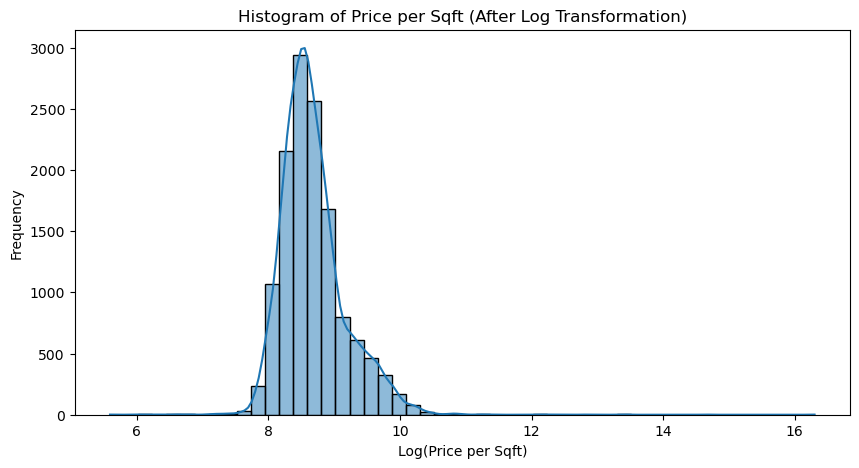

Skewness after transformation: 1.40
Kurtosis after transformation: 9.20


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load the dataset
df = pd.read_csv("C:\\Users\\AMAN MUJEEB\\Downloads\\house_price.csv")

# Extract the price_per_sqft column
if "price_per_sqft" not in df.columns:
    raise ValueError("Column 'price_per_sqft' not found in dataset.")

price_per_sqft = df["price_per_sqft"]

# Skewness and Kurtosis before transformation
original_skewness = skew(price_per_sqft)
original_kurtosis = kurtosis(price_per_sqft)

# Plot histogram before transformation
plt.figure(figsize=(10, 5))
sns.histplot(price_per_sqft, bins=50, kde=True)
plt.title("Histogram of Price per Sqft (Before Transformation)")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.show()

print(f"Skewness before transformation: {original_skewness:.2f}")
print(f"Kurtosis before transformation: {original_kurtosis:.2f}")

# Apply Log Transformation (to reduce skewness)
price_per_sqft_transformed = np.log1p(price_per_sqft)

# Skewness and Kurtosis after transformation
transformed_skewness = skew(price_per_sqft_transformed)
transformed_kurtosis = kurtosis(price_per_sqft_transformed)

# Plot histogram after transformation
plt.figure(figsize=(10, 5))
sns.histplot(price_per_sqft_transformed, bins=50, kde=True)
plt.title("Histogram of Price per Sqft (After Log Transformation)")
plt.xlabel("Log(Price per Sqft)")
plt.ylabel("Frequency")
plt.show()

print(f"Skewness after transformation: {transformed_skewness:.2f}")
print(f"Kurtosis after transformation: {transformed_kurtosis:.2f}")


# 5. Exploring Correlations: Heatmap of Numerical Features in House Prices

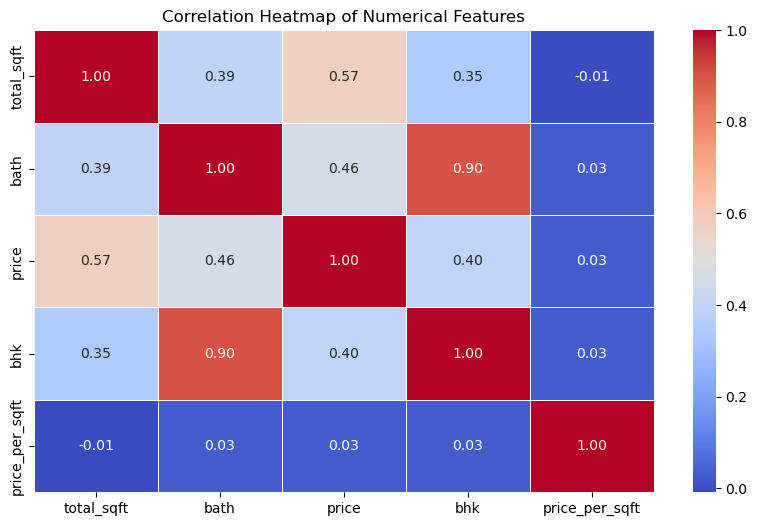

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\AMAN MUJEEB\\Downloads\\house_price.csv")

# Select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# 6. Visualizing Correlations with Scatter Plots

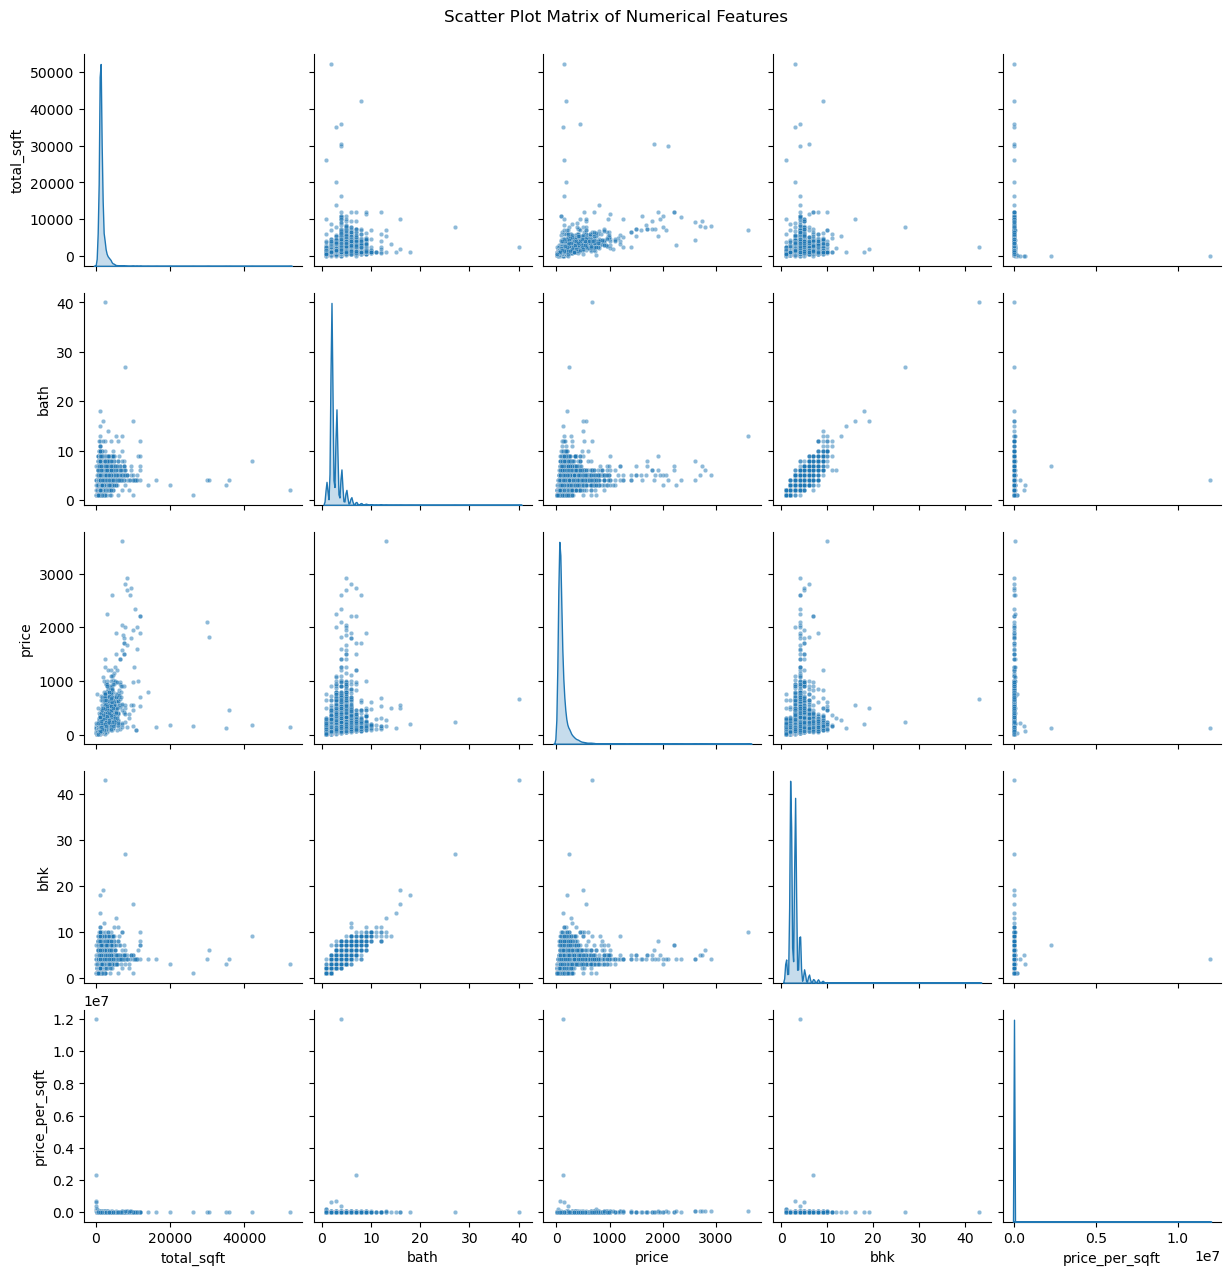

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\AMAN MUJEEB\\Downloads\\house_price.csv")

# Select numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Pairwise Scatter Plot
sns.pairplot(df_numeric, diag_kind='kde', plot_kws={'alpha':0.5, 's':10})
plt.suptitle("Scatter Plot Matrix of Numerical Features", y=1.02)
plt.show()
